In [70]:
import pandas as pd
import sys
import os
%matplotlib inline

In [2]:
os.chdir("E:\project\kaggle\Rossmann Store Sales\data")

In [3]:
data = pd.read_csv("train.csv")

C:\WinPython\python-2.7.9.amd64\lib\site-packages\pandas\io\parsers.py:1170: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 77.6+ MB


In [5]:
data.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0L], dtype=object)

In [6]:
data.loc[data.StateHoliday == 0, 'StateHoliday'] = '0'

In [7]:
data.StateHoliday.unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [36]:
data[data.Open == 0].Sales.unique()

array([0], dtype=int64)

In [62]:
data[(data.SchoolHoliday == 1) & (data.StateHoliday == '0')][['DayOfWeek', 'StateHoliday', 'Date']]

,DayOfWeek,StateHoliday,Date
0,5,0,2015-07-31
1,5,0,2015-07-31
2,5,0,2015-07-31
3,5,0,2015-07-31
4,5,0,2015-07-31
5,5,0,2015-07-31
6,5,0,2015-07-31
7,5,0,2015-07-31
8,5,0,2015-07-31
9,5,0,2015-07-31


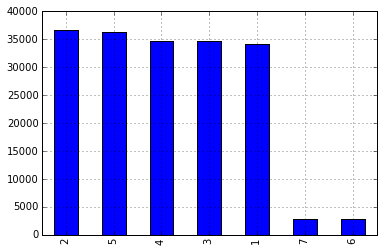

In [83]:
data[(data.SchoolHoliday == 1)].DayOfWeek.value_counts().plot(kind='bar')

In [86]:
week = pd.get_dummies(data.DayOfWeek, prefix='week')
holiday = pd.get_dummies(data.StateHoliday, prefix='holiday')
data = pd.concat([data, week, holiday], axis=1)
data.drop(['DayOfWeek', 'StateHoliday'], axis=1, inplace=True)

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
Store            1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
SchoolHoliday    1017209 non-null int64
week_1           1017209 non-null float64
week_2           1017209 non-null float64
week_3           1017209 non-null float64
week_4           1017209 non-null float64
week_5           1017209 non-null float64
week_6           1017209 non-null float64
week_7           1017209 non-null float64
holiday_0        1017209 non-null float64
holiday_a        1017209 non-null float64
holiday_b        1017209 non-null float64
holiday_c        1017209 non-null float64
dtypes: float64(11), int64(6), object(1)
memory usage: 147.5+ MB


In [142]:
store = pd.read_csv("store.csv")

In [90]:
store.head()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,stype_a,stype_b,stype_c,stype_d,assort_a,assort_b,assort_c
0,1,1270,9,2008,0,NaN,NaN,NaN,0,0,1,0,1,0,0
1,2,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",1,0,0,0,1,0,0
2,3,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",1,0,0,0,1,0,0
3,4,620,9,2009,0,NaN,NaN,NaN,0,0,1,0,0,0,1
4,5,29910,4,2015,0,NaN,NaN,NaN,1,0,0,0,1,0,0


In [27]:
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 95.8+ KB


In [28]:
store.CompetitionDistance.describe()

count     1112.000000
mean      5404.901079
std       7663.174720
min         20.000000
25%        717.500000
50%       2325.000000
75%       6882.500000
max      75860.000000
Name: CompetitionDistance, dtype: float64

In [29]:
stype = pd.get_dummies(store.StoreType, prefix='stype')
assort = pd.get_dummies(store.Assortment, prefix='assort')

In [30]:
store = pd.concat([store, stype, assort], axis=1)
store.drop(['StoreType', 'Assortment'], axis=1, inplace=True)

In [31]:
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 0 to 1114
Data columns (total 15 columns):
Store                        1115 non-null int64
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
stype_a                      1115 non-null float64
stype_b                      1115 non-null float64
stype_c                      1115 non-null float64
stype_d                      1115 non-null float64
assort_a                     1115 non-null float64
assort_b                     1115 non-null float64
assort_c                     1115 non-null float64
dtypes: float64(12), int64(2), object(1)
memory usage: 139.4+ KB


In [88]:
test = pd.read_csv("test.csv")

In [89]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 8 columns):
Id               41088 non-null int64
Store            41088 non-null int64
DayOfWeek        41088 non-null int64
Date             41088 non-null object
Open             41077 non-null float64
Promo            41088 non-null int64
StateHoliday     41088 non-null object
SchoolHoliday    41088 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 2.8+ MB


In [132]:
data.at[1017208,'Store']

1115

In [130]:
data.shape[0]

1017209

In [135]:
store[store.Store == 1].at[0, 'stype_a']

0.0

In [136]:
test.at[0, 'Date']

'2015-09-17'

In [181]:
store[1:2].StoreType

1    a
Name: StoreType, dtype: object

In [189]:
store[store.Store == 19].head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
18,19,a,c,3240,NaN,NaN,1,22,2011,"Mar,Jun,Sept,Dec"


In [188]:
test[test.Store == 19]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
12,13,19,4,2015-09-17,1,1,0,0
868,869,19,3,2015-09-16,1,1,0,0
1724,1725,19,2,2015-09-15,1,1,0,0
2580,2581,19,1,2015-09-14,1,1,0,0
3436,3437,19,7,2015-09-13,0,0,0,0
4292,4293,19,6,2015-09-12,1,0,0,0
5148,5149,19,5,2015-09-11,1,0,0,0
6004,6005,19,4,2015-09-10,1,0,0,0
6860,6861,19,3,2015-09-09,1,0,0,0
7716,7717,19,2,2015-09-08,1,0,0,0
